# K-Nearest Neighbors (KNN)


این الگوریتم پیش بینی باران, دارای مجموعه داده ای بسیار عالی برای پیش بینی بارش باران در طول روز هست. داده شامل جهت ورزش باد هاو دمای هوا در ساعات مختلف و...  هست که به پیش بینی بهتر کمک میکنه.

This rain prediction algorithm has an excellent dataset for forecasting rainfall throughout the day. The data includes wind direction, temperature at different hours, and so on, which help with better prediction.



 توجه توضیح یسری از سلول ها اگر وجود ندارد در فایل

music.ipynb
 است

 Note: Some of the explanations or cells may be missing here, but they are available in the file `music.ipynb`.

In [13]:
import pandas as pd
import numpy as np
import matplotlib_inline

%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


 دیتا از:https://www.kaggle.com/code/karnikakapoor/rain-prediction-ann
 ~~~Data

In [14]:
x=pd.read_csv('weatherAUS.csv').dropna()
x[:5]

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

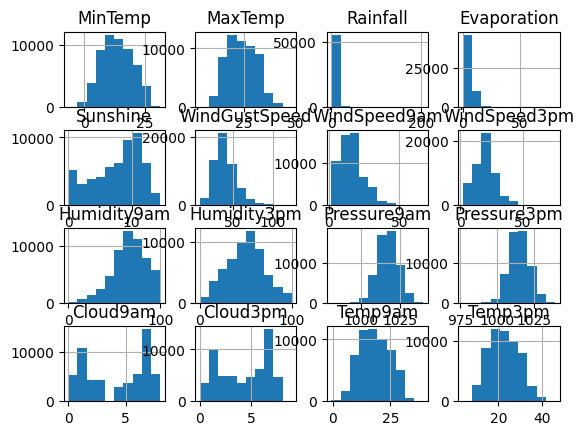

In [15]:
x.hist()

In [16]:
from sklearn.preprocessing import LabelEncoder
lb0=LabelEncoder()
x['Location']=lb0.fit_transform(x['Location'])

lb1=LabelEncoder()
x['WindGustDir']=lb1.fit_transform(x['WindGustDir'])

lb2=LabelEncoder()
x['WindSpeed3pm']=lb2.fit_transform(x['WindSpeed3pm'])

lb3=LabelEncoder()
x['WindDir9am']=lb3.fit_transform(x['WindDir9am'])

lb4=LabelEncoder()
x['WindSpeed9am']=lb4.fit_transform(x['WindSpeed9am'])

lb5=LabelEncoder()
x['WindDir3pm']=lb5.fit_transform(x['WindDir3pm'])

In [17]:
L6_y=LabelEncoder()
x['RainToday']=L6_y.fit_transform(x['RainToday'])
x['RainToday']

6049      0
6050      0
6052      0
6053      0
6054      0
         ..
142298    0
142299    0
142300    0
142301    0
142302    0
Name: RainToday, Length: 56564, dtype: int64

In [18]:
y=x['RainToday'].values
y[:7]

array([0, 0, 0, 0, 0, 0, 0])

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

print('set train shape:',x_train.shape,y_train.shape)
print('set test shape:',x_test.shape,y_test.shape)

set train shape: (45251, 21) (45251,)
set test shape: (11313, 21) (11313,)



بیش پردازش : وقتی داده‌ها بیش از حد نویزی یا پراکنده باشند، از تکنیک‌های بیش پردازش  برای سازماندهی و پاکسازی داده‌ها استفاده می‌کنیم. این به الگوریتم کمک                                                                                                                      ما می‌کنه تا به طور مؤثرتری یاد بگیره و منجر به نمرات بالاتر در معیارهای مختلف ارزیابی میشود.

Overprocessing: When the data is too noisy or scattered, we use overprocessing techniques to organize and clean the data. This helps the algorithm learn more effectively and leads to higher scores across various evaluation metrics


In [28]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
train1=sc.fit_transform(x_train)
test1=sc.transform(x_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
k=4
knn=KNeighborsClassifier(n_neighbors=k).fit(train1,y_train)
knn

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
y_pred=knn.predict(test1)
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(11313,))


الگوریتم عالی عمل کرده تمام معیار های ارزیابی 1 شدن و از این بهتر نمیشه

The algorithm performed excellently; all evaluation metrics reached 1, and it doesn't get better than this

In [31]:
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score

print('accuracy:',accuracy_score(y_pred,y_test))
print('recall:',recall_score(y_pred,y_test))
print('f1:',f1_score(y_pred,y_test))
print('precision:',precision_score(y_pred,y_test))

accuracy: 1.0
recall: 1.0
f1: 1.0
precision: 1.0
